In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.8.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



# Euler equations eigensystem

## Primitive variable form

The Euler equations in primitive variable form, ${\bf q} = (\rho, u, p)^\intercal$ appear as:

$${\bf q}_t + {\bf A}({\bf q}) {\bf q}_x = 0$$

with the matrix ${\bf A}({\bf q})$:


$${\bf A}({\bf q}) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & \gamma p & u \end{array} \right )  
$$

The sound speed is related to the adiabatic index, $\gamma$, as $c^2 = \gamma p /\rho$.

We can represent this matrix symbolically in SymPy and explore its eigensystem.

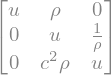

In [2]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')

A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

The eigenvalues are the speeds at which information propagates with.  SymPy returns them as a
dictionary, giving the multiplicity for each eigenvalue.

In [3]:
A.eigenvals()

The right eigenvectors are what SymPy gives natively.  For a given eigenvalue, $\lambda$, these 
satisfy:
    
$${\bf A} {\bf r} = \lambda {\bf r}$$

### Right Eigenvectors

In [4]:
R = A.eigenvects()   # this returns a tuple for each eigenvector with multiplicity -- unpack it
r = []
lam = []
for (ev, _, rtmp) in R:
    r.append(rtmp[0])
    lam.append(ev)
    
# we can normalize them anyway we want, so let's make the first entry 1
for n in range(len(r)):
    v = r[n]
    r[n] = v/v[0]

#### 0-th right eigenvector 

In [5]:
r[0]

this corresponds to the eigenvalue

In [6]:
lam[0]

#### 1-st right eigenvector

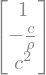

In [7]:
r[1]

this corresponds to the eigenvalue

In [8]:
lam[1]

#### 2-nd right eigenvector

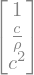

In [9]:
r[2]

this corresponds to the eigenvalue

In [10]:
lam[2]

Here they are as a matrix, ${\bf R}$, in order from smallest to largest eigenvalue

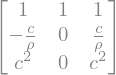

In [11]:
R = zeros(3,3)
R[:,0] = r[1]
R[:,1] = r[0]
R[:,2] = r[2]
R

### Left Eigenvectors

The left eigenvectors satisfy:

$${\bf l} {\bf A} = \lambda {\bf l}$$

We'll find these by taking the transpose of ${\bf A}$

$$({\bf l} {\bf A})^\intercal = {\bf A}^\intercal {\bf l}^\intercal = \lambda {\bf l}^\intercal$$

Therefore, the transpose of the left eigenvectors, ${\bf l}^\intercal$, are the right eigenvectors of transpose of ${\bf A}$

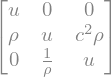

In [12]:
B = A.transpose()
B

In [13]:
L = B.eigenvects()
l = []
laml = []
for (ev, _, ltmp) in L:
    l.append(ltmp[0].transpose())
    laml.append(ev)
    

Traditionally, we normalize these such that $l^{(\mu)} \cdot r^{(\nu)} = \delta_{\mu\nu}$

In [14]:
for n in range(len(l)):
    if lam[n] == laml[n]:
        ltmp = l[n]
        p = ltmp.dot(r[n])
        l[n] = ltmp/p

#### 0-th left eigenvector

In [15]:
l[0]

#### 1-st left eigenvector

In [16]:
l[1]

#### 2-nd left eigenvector

In [17]:
l[2]

## Entropy formulation

here we write the system in terms of ${\bf q}_s = (\rho, u, s)^\intercal$, where the system is

$${{\bf q}_s}_t + {\bf A}_s({\bf q}_s) {{\bf q}_s}_x = 0$$

and 

$$
{\bf A}_s = \left (\begin{matrix}u & \rho & 0\\
      \frac{c^{2}}{\rho} & u & \frac{p_{s}}{\rho}\\
         0 & 0 & u\end{matrix}\right)
         $$

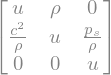

In [18]:
ps = symbols('p_s')

As = Matrix([[u, rho, 0], [c**2/rho, u, ps/rho], [0, 0, u]])
As

In [19]:
As.eigenvals()

In [20]:
R = As.eigenvects()   # this returns a tuple for each eigenvector with multiplicity -- unpack it
r = []
lam = []
for (ev, _, rtmp) in R:
    r.append(rtmp[0])
    lam.append(ev)
    
# we can normalize them anyway we want, so let's make the first entry 1
for n in range(len(r)):
    v = r[n]
    r[n] = v/v[0]

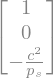

In [21]:
r[0]

this corresponds to eigenvalue

In [23]:
lam[0]

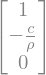

In [24]:
r[1]

this corresponds to eigenvalue

In [25]:
lam[1]

In [26]:
r[2]

this corresponds to eigenvalue

In [27]:
lam[2]

### left eigenvectors

In [24]:
Bs = As.transpose()
L = B.eigenvects()
l = []
laml = []
for (ev, _, ltmp) in L:
    l.append(ltmp[0].transpose())
    laml.append(ev)
    

normalization

In [25]:
for n in range(len(l)):
    if lam[n] == laml[n]:
        ltmp = l[n]
        p = ltmp.dot(r[n])
        l[n] = ltmp/p

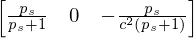

In [26]:
simplify(l[0])

In [27]:
l[1]

In [28]:
l[2]